# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
#%pip install pandas-datareader
#%pip install git+https://github.com/alemartinello/dstapi
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


# Read and clean data

In [11]:
EX = DstApi('UHM') 
tabsum = EX.tablesummary(language='en')
display(tabsum)

# The available values for a each variable: 
for variable in tabsum['variable name']:
    print(variable+':')
    display(EX.variable_levels(variable, language='en'))

params = EX._define_base_params(language='en')  # Returns a view, that we can edit
params

variables = params['variables']
variables[0]['values'] = ['1.A']
variables[1]['values'] =['2']
variables[2]['values'] = ['US','SE','DE']
variables[3]['values'] = ['93']
variables[4]['values'] = ['2']
variables[5]['values'] = ['2019M01','2024M02']
params

EX_api = EX.get_data(params=params)
EX_api.head(5)



Table UHM: External trade monthly by items, imports and exports, country, unit, seasonal adjustment and time
Last update: 2024-04-09T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,POST,23,1.A,GOODS AND SERVICES,1.A.B.X,Other services,False
1,INDUD,2,1,Imports,2,Exports,False
2,LAND,11,W1,REST OF THE WORLD,CN,China,False
3,ENHED,4,93,Million DKK,102,Percentage change (year),False
4,SÆSON,2,1,Non-seasonally adjusted,2,Seasonally adjusted,False
5,Tid,170,2010M01,2010M01,2024M02,2024M02,True


POST:


,id,text
0,1.A,GOODS AND SERVICES
1,1.A.A,GOODS (FOB)
2,1.A.A.1.Z,GOODS THAT CROSSES DANISH BORDERS
3,1.A.A.1.0-4X2-3,"Live animals, Food, Beverages And Tobacco"
4,1.A.A.1.2,"Crude Materials, Inedible, Except Fuels"
5,1.A.A.1.3,"Mineral Fuels, Lubricants And Related Materials"
6,1.A.A.1.5,Chemicals And Related Products
7,1.A.A.1.6,Manufactured Goods Classified Chiefly By Material
8,1.A.A.1.7X78-79,Machinery (excl. Transport Equipment)
9,1.A.A.1.78-79,"Transport Equipment (excl. Vessels, aircraft e..."


INDUD:


,id,text
0,1,Imports
1,2,Exports


LAND:


,id,text
0,W1,REST OF THE WORLD
1,B6,EU-27 (without the United Kingdom)
2,FR,France
3,NL,Netherlands
4,SE,Sweden
5,DE,Germany
6,D6,Extra EU-27
7,NO,Norway
8,GB,United Kingdom
9,US,United States


ENHED:


,id,text
0,93,Million DKK
1,100,Percentage change (month)
2,101,Percentage change (3 months)
3,102,Percentage change (year)


SÆSON:


,id,text
0,1,Non-seasonally adjusted
1,2,Seasonally adjusted


Tid:


,id,text
0,2010M01,2010M01
1,2010M02,2010M02
2,2010M03,2010M03
3,2010M04,2010M04
4,2010M05,2010M05
...,...,...
165,2023M10,2023M10
166,2023M11,2023M11
167,2023M12,2023M12
168,2024M01,2024M01


,POST,INDUD,LAND,ENHED,SÆSON,TID,INDHOLD
0,GOODS AND SERVICES,Exports,Germany,Million DKK,Seasonally adjusted,2019M01,12768.9
1,GOODS AND SERVICES,Exports,Sweden,Million DKK,Seasonally adjusted,2019M01,11034.0
2,GOODS AND SERVICES,Exports,United States,Million DKK,Seasonally adjusted,2019M01,11061.5
3,GOODS AND SERVICES,Exports,Germany,Million DKK,Seasonally adjusted,2024M02,19144.0
4,GOODS AND SERVICES,Exports,Sweden,Million DKK,Seasonally adjusted,2024M02,11643.6


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [2]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

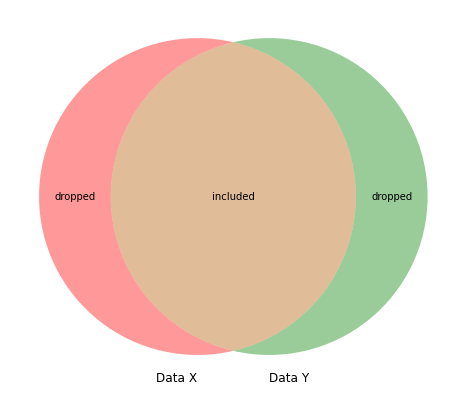

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.